<!-------------------------------->
<!--  DO NOT CHANGE STYLE BELOW -->
<style>
H3{color:darkblue !important;font-weight: bold !important}
blockquote{background:lightcyan !important; color:black !important;padding:10pt !important;font-weight: bold !important}
table{font-size:110%  !important}
hr{width: 100% !important; height: 3px !important; background:black !important;}
</style>
<!--  DO NOT CHANGE STYLE ABOVE -->
<!-------------------------------->

---

    
Reza| Amini| 672783344|ramini3@uic.edu|






<!-------------------------------->
<!--  DO NOT CHANGE STYLE BELOW -->
<style>
H3{color:darkblue !important;font-weight: bold !important}
blockquote{background:lightcyan !important; color:black !important;padding:10pt !important;font-weight: bold !important}
table{font-size:110%  !important}
hr{width: 100% !important; height: 3px !important; background:black !important;}
</style>
<!--  DO NOT CHANGE STYLE ABOVE -->
<!-------------------------------->


---

### **Question 1. Part 1.**

Execute LinearRegression from sklearn (which is based on SVD) and use it to minimize the mean squared error (MSE). Applying SVD to minimize MSE amounts to finding a 
w
∗
 that satisfies 
∇
f
(
w
)
=
0
. In this case, is 
w
∗
 guaranteed to be get close to a global minimum (modulo numerical issues)? Explain your answer.
### **Answer.**

Here we ran the linear regression algorithm to optimize the given mean square error. The results will then be compared with ones from gradient descent and stochastic gradient descent.\
**Note:** The parts of the code that were identical with what has been discussed in the class were copied directly. 

In [6]:
"""
____________________________
Code for Question 1. Part 1.
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
"""

# Load numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
# Load function load_svmlight_file from sklearn.datasets
from sklearn.datasets import load_svmlight_file
# Load function normalize from sklearn.datasets
from sklearn import preprocessing

# Function defined to load training and testing data in files 
# log1p.E2006.train.bz2 and log1p.E2006.test.bz2, respectively
# The data is loaded in compressed sparse row (CSR) matrix format
def data_loader():    
    X_train, y_train    = load_svmlight_file('log1p.E2006.train.bz2',   n_features=4272227)
    X_test, y_test      = load_svmlight_file('log1p.E2006.test.bz2',    n_features=4272227)

    ## Normalize the data using Normalizer, which scales the data to unit norm.
    # This line computes the normalization coefficient
    scaler = preprocessing.Normalizer().fit(X_train)

    # Use the tranform function to normalize the training and test feature data
    # Since we calling it from the scaler instance we created, it knows the correct
    # scaling for normalization
    X_train             = scaler.transform(X_train)
    X_test              = scaler.transform(X_test)

    return  X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test    = data_loader()

# Shape prints out the rows and columns of the train and test data sets
# Rows = observations/data points; columns = features
num_train_obs, num_features         = np.shape(X_train)
num_test_obs, num_features          = np.shape(X_test)    

In [7]:
X_train[X_train.nonzero()] = np.log(X_train[X_train.nonzero()] + 1)
X_test[X_test.nonzero()] = np.log(X_test[X_test.nonzero()] + 1)

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
# module time has different functions to track time
import time

# Store start time before executing the LinearRegression function
start = time.time()

# Create LinearRegression instance
LinReg      = LinearRegression(
                                    fit_intercept           = True,
                                    n_jobs                  = 10,
                                    )

# Run linear regression
mat_inv = LinReg.fit(X_train, y_train)

# Compute run time
runtime = time.time() - start

#Accessing regression intercept and coefficients
reg_intercept  = mat_inv.intercept_
reg_coeff = mat_inv.coef_

# The predict function uses the computed regression coefficient to predict the target
test_target_pred = mat_inv.predict(X_test)

# Compute train and test mean squared error
mat_inv_train_error         = mean_squared_error(mat_inv.predict(X_train), y_train)
mat_inv_test_error          = mean_squared_error(mat_inv.predict(X_test), y_test)
# Compute train and test R^2
mat_inv_r_square_train      = mat_inv.score(X_train, y_train)    
mat_inv_r_square_test       = mat_inv.score(X_test, y_test)   
    
# Print out statistics
print('Least Squares via Matrix Inversion:\n')
print('{:>15}{:>15}{:>15}{:>15}{:>15}'.format('Train MSE','Test MSE','Train R-square','Test R-square','runtime (s)'))
print('{:>15.4f}{:>15.4f}{:>15.4f}{:>15.4f}{:>15.1f}'.format(mat_inv_train_error,mat_inv_test_error,mat_inv_r_square_train,mat_inv_r_square_test,runtime))


Least Squares via Matrix Inversion:

      Train MSE       Test MSE Train R-square  Test R-square    runtime (s)
         0.0000         0.1712         1.0000         0.4078          715.6


<!-------------------------------->
<!--  DO NOT CHANGE STYLE BELOW -->
<style>
H3{color:darkblue !important;font-weight: bold !important}
blockquote{background:lightcyan !important; color:black !important;padding:10pt !important;font-weight: bold !important}
table{font-size:110%  !important}
hr{width: 100% !important; height: 3px !important; background:black !important;}
</style>
<!--  DO NOT CHANGE STYLE ABOVE -->
<!-------------------------------->



---

### **Question 1. Part 2.**
Now experiment with the parameters of GD and SGD. Specifically, the number of iterations, stopping tolerance, and step size rule. Feel free to be creative, that is, use any of the step size rules allowed by SGDRegressor or change other parameters. Can you match or improve on the MSE from part 1? What parameter change decreased MSE the most when using GD and SGD? How did this affect the run time per epoch in each case?


### **Answer.**

| Cases       | Penalty      | alpha         | max_iter   | learning rate  |  tol  |
| :---        |    :----:    |          ---: | :---       | :----:           | :---  |
| A           | L2         | 0            |1000|       CONSTANT|1e-3
| B           | L2         | 0.00001            |1000|       CONSTANT|1e-3
| C           | L2         |0.0001            |1000|       CONSTANT|1e-3
| D           | L2         | 0.001            |1000|       CONSTANT|1e-3
| E           | L2         | 0.1           |1000|       CONSTANT|1e-3
| F           | L2         | 1            |1000|       CONSTANT|1e-3
| G           | L1        | 0.00001            |1000|       CONSTANT|1e-3
| H           | L1         | 00.0001            |1000|       CONSTANT|1e-3
| I           | L1         | 0.01            |1000|       CONSTANT|1e-3
| J           | L2         | 0            |1000|       CONSTANT|1e-4
| K           | L2         | 0            |1000|       CONSTANT|1e-2
| L           | L2         | 0            |100|       CONSTANT|1e-3
| M           | L2         | 0            |500|       CONSTANT|1e-3
| N           | L2         | 0            |1000|       Adaotive|1e-3
| O           | elasticnet         | 0            | 0.00001|       CONSTANT|1e-4




Here we implemented the gradient descent algorithm by different parameters and plotted the running time and train and test MSE with respect to iteration number. we tried to use different penalties: l1,l2,elacticnet, alphas: between 0 and 1, learning rate: constant and adaptive, tolerance: 1e-2 to 1e-4. So, based on different amount of these parameters we achieved 18 cases from case A to Case O.

### Case A:

In [12]:
"""
____________________________
Code for Question 1. Part 2.
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
"""

import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


# Initialize SGD regressor object
# We will run gradient descent using the SGDRegressor sklearn object
gd             = SGDRegressor(
                                    fit_intercept   = False,
                                    alpha           = 0.0,
                                    max_iter        = 1000,
                                    learning_rate   = 'constant',
                                    tol             = 1e-3,
                                    random_state    = 1000)

print('Gradient Descent:')
print('{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}'.format('Iteration','Train MSE','Test MSE','Train R-square','Test R-square','Tot runtime'))

start = time.time()
# Create an list to store the per iteration run time
per_iter_runtime_list = []
runtime_list_1 = []
MSE_train_list_1 = []
MSE_test_list_1 = []
# Max number of iterations set to 1000
for _ in range(1001):

    per_iter_start   = time.time()
    
    # This line of code executes one iteration of gradient descent
    # If you want to implement mini-batch, just modify this code
    # so that input is the sampled batch of rows as opposed to
    # the full training set
    gd.partial_fit(X_train, y_train)
    per_iter_runtime = time.time() - per_iter_start
    per_iter_runtime_list.append(per_iter_runtime)

    # The if statement here will execute every 100 iterations
    if _%100==0:
        
        gd_train_error          = mean_squared_error(gd.predict(X_train), y_train)
        gd_test_error           = mean_squared_error(gd.predict(X_test), y_test)
        gd_r_square_train       = gd.score(X_train, y_train)    
        gd_r_square_test        = gd.score(X_test, y_test)   
        print('{:>15.0f}{:>15.4f}{:>15.4f}{:>15.4f}{:>15.1f}{:>15.1f}'.format(_,gd_train_error,gd_test_error,gd_r_square_train,gd_r_square_test,time.time()-start))
        runtime_list_1.append(time.time()-start)
        MSE_train_list_1.append(gd_train_error)
        MSE_test_list_1.append(gd_test_error)
print('Per update runtime:{:>15.3f}'.format(np.mean(per_iter_runtime_list)))

Gradient Descent:
      Iteration      Train MSE       Test MSE Train R-square  Test R-square    Tot runtime
              0         0.2702         0.2731         0.3241            0.1            1.1
            100         0.0650         0.1421         0.8374            0.5           46.1
            200         0.0414         0.1386         0.8965            0.5           92.4
            300         0.0298         0.1381         0.9255            0.5          138.7
            400         0.0228         0.1384         0.9431            0.5          185.0
            500         0.0180         0.1389         0.9549            0.5          232.1
            600         0.0147         0.1396         0.9633            0.5          277.9
            700         0.0121         0.1403         0.9696            0.5          324.1
            800         0.0102         0.1409         0.9745            0.5          369.7
            900         0.0087         0.1416         0.9784            

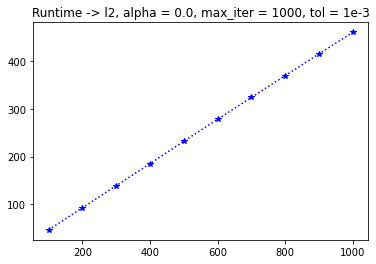

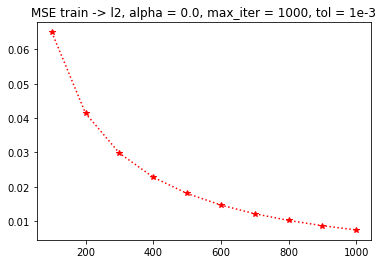

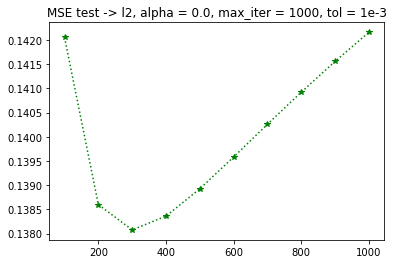

In [13]:
plt.plot(np.arange(100, 1001, 100), runtime_list_1[1:], 'b*:')
plt.title("Runtime -> l2, alpha = 0.0, max_iter = 1000, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_train_list_1[1:], 'r*:')
plt.title("MSE train -> l2, alpha = 0.0, max_iter = 1000, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_test_list_1[1:], 'g*:')
plt.title("MSE test -> l2, alpha = 0.0, max_iter = 1000, tol = 1e-3")
plt.show()

### Case B:

In [14]:
# Initialize SGD regressor object
# We will run gradient descent using the SGDRegressor sklearn object
gd             = SGDRegressor(
                                    fit_intercept   = False,
                                    alpha           = 0.00001,
                                    max_iter        = 1000,
                                    learning_rate   = 'constant',
                                    tol             = 1e-3,
                                    random_state    = 1000)

print('Gradient Descent:')
print('{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}'.format('Iteration','Train MSE','Test MSE','Train R-square','Test R-square','Tot runtime'))

start = time.time()
# Create an list to store the per iteration run time
per_iter_runtime_list = []
runtime_list_2 = []
MSE_train_list_2 = []
MSE_test_list_2 = []
# Max number of iterations set to 1000
for _ in range(1001):

    per_iter_start   = time.time()
    
    # This line of code executes one iteration of gradient descent
    # If you want to implement mini-batch, just modify this code
    # so that input is the sampled batch of rows as opposed to
    # the full training set
    gd.partial_fit(X_train, y_train)
    per_iter_runtime = time.time() - per_iter_start
    per_iter_runtime_list.append(per_iter_runtime)

    # The if statement here will execute every 100 iterations
    if _%100==0:
        gd_train_error          = mean_squared_error(gd.predict(X_train), y_train)
        gd_test_error           = mean_squared_error(gd.predict(X_test), y_test)
        gd_r_square_train       = gd.score(X_train, y_train)    
        gd_r_square_test        = gd.score(X_test, y_test)   
        print('{:>15.0f}{:>15.4f}{:>15.4f}{:>15.4f}{:>15.1f}{:>15.1f}'.format(_,gd_train_error,gd_test_error,gd_r_square_train,gd_r_square_test,time.time()-start))
        runtime_list_2.append(time.time()-start)
        MSE_train_list_2.append(gd_train_error)
        MSE_test_list_2.append(gd_test_error)
print('Per update runtime:{:>15.3f}'.format(np.mean(per_iter_runtime_list)))

Gradient Descent:
      Iteration      Train MSE       Test MSE Train R-square  Test R-square    Tot runtime
              0         0.2703         0.2731         0.3239            0.1            1.1
            100         0.0688         0.1427         0.8278            0.5           46.6
            200         0.0481         0.1390         0.8798            0.5           92.3
            300         0.0387         0.1380         0.9032            0.5          138.4
            400         0.0335         0.1376         0.9162            0.5          184.1
            500         0.0303         0.1375         0.9243            0.5          229.7
            600         0.0282         0.1374         0.9295            0.5          275.4
            700         0.0267         0.1374         0.9331            0.5          320.8
            800         0.0257         0.1374         0.9356            0.5          366.3
            900         0.0250         0.1374         0.9374            

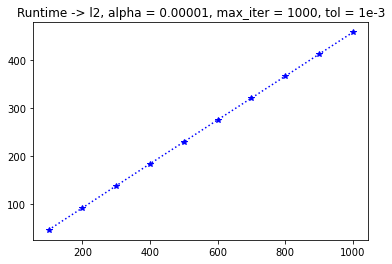

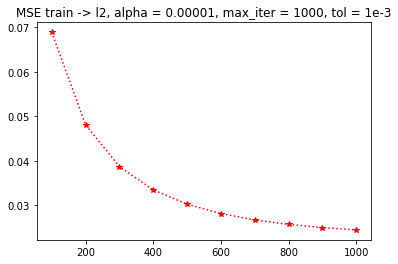

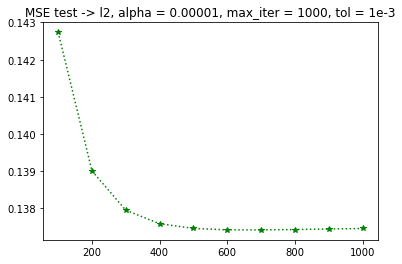

In [15]:
plt.plot(np.arange(100, 1001, 100), runtime_list_2[1:], 'b*:')
plt.title("Runtime -> l2, alpha = 0.00001, max_iter = 1000, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_train_list_2[1:], 'r*:')
plt.title("MSE train -> l2, alpha = 0.00001, max_iter = 1000, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_test_list_2[1:], 'g*:')
plt.title("MSE test -> l2, alpha = 0.00001, max_iter = 1000, tol = 1e-3")
plt.show()

### Case C:

In [16]:
# Initialize SGD regressor object
# We will run gradient descent using the SGDRegressor sklearn object
gd             = SGDRegressor(
                                    fit_intercept   = False,
                                    alpha           = 0.0001,
                                    max_iter        = 1000,
                                    learning_rate   = 'constant',
                                    tol             = 1e-3,
                                    random_state    = 1000)

print('Gradient Descent:')
print('{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}'.format('Iteration','Train MSE','Test MSE','Train R-square','Test R-square','Tot runtime'))

start = time.time()
# Create an list to store the per iteration run time
per_iter_runtime_list = []
# Max number of iterations set to 1000
runtime_list_3 = []
MSE_train_list_3 = []
MSE_test_list_3 = []
for _ in range(1001):

    per_iter_start   = time.time()
    
    # This line of code executes one iteration of gradient descent
    # If you want to implement mini-batch, just modify this code
    # so that input is the sampled batch of rows as opposed to
    # the full training set
    gd.partial_fit(X_train, y_train)
    per_iter_runtime = time.time() - per_iter_start
    per_iter_runtime_list.append(per_iter_runtime)

    # The if statement here will execute every 100 iterations
    if _%100==0:
        gd_train_error          = mean_squared_error(gd.predict(X_train), y_train)
        gd_test_error           = mean_squared_error(gd.predict(X_test), y_test)
        gd_r_square_train       = gd.score(X_train, y_train)    
        gd_r_square_test        = gd.score(X_test, y_test)   
        print('{:>15.0f}{:>15.4f}{:>15.4f}{:>15.4f}{:>15.1f}{:>15.1f}'.format(_,gd_train_error,gd_test_error,gd_r_square_train,gd_r_square_test,time.time()-start))
        runtime_list_3.append(time.time()-start)
        MSE_train_list_3.append(gd_train_error)
        MSE_test_list_3.append(gd_test_error)
print('Per update runtime:{:>15.3f}'.format(np.mean(per_iter_runtime_list)))

Gradient Descent:
      Iteration      Train MSE       Test MSE Train R-square  Test R-square    Tot runtime
              0         0.2708         0.2739         0.3225            0.1            1.1
            100         0.0994         0.1516         0.7515            0.5           46.6
            200         0.0952         0.1505         0.7618            0.5           92.4
            300         0.0947         0.1504         0.7630            0.5          138.0
            400         0.0947         0.1503         0.7632            0.5          183.6
            500         0.0947         0.1503         0.7632            0.5          229.3
            600         0.0947         0.1503         0.7632            0.5          275.3
            700         0.0947         0.1503         0.7632            0.5          320.8
            800         0.0947         0.1503         0.7632            0.5          366.3
            900         0.0947         0.1503         0.7632            

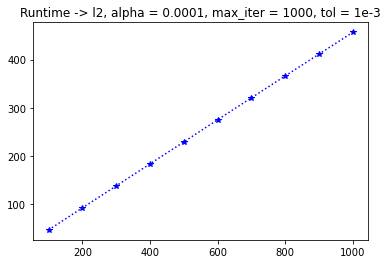

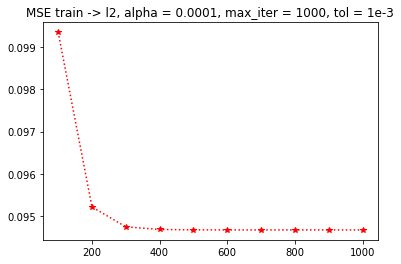

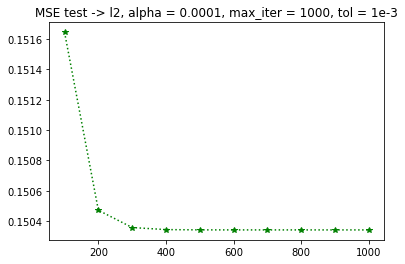

In [17]:
plt.plot(np.arange(100, 1001, 100), runtime_list_3[1:], 'b*:')
plt.title("Runtime -> l2, alpha = 0.0001, max_iter = 1000, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_train_list_3[1:], 'r*:')
plt.title("MSE train -> l2, alpha = 0.0001, max_iter = 1000, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_test_list_3[1:], 'g*:')
plt.title("MSE test -> l2, alpha = 0.0001, max_iter = 1000, tol = 1e-3")
plt.show()

### Case D:

In [18]:
# Initialize SGD regressor object
# We will run gradient descent using the SGDRegressor sklearn object
gd             = SGDRegressor(
                                    fit_intercept   = False,
                                    alpha           = 0.001,
                                    max_iter        = 1000,
                                    learning_rate   = 'constant',
                                    tol             = 1e-3,
                                    random_state    = 1000)

print('Gradient Descent:')
print('{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}'.format('Iteration','Train MSE','Test MSE','Train R-square','Test R-square','Tot runtime'))

start = time.time()
# Create an list to store the per iteration run time
per_iter_runtime_list = []
# Max number of iterations set to 1000
runtime_list_4 = []
MSE_train_list_4 = []
MSE_test_list_4 = []
for _ in range(1001):

    per_iter_start   = time.time()
    
    # This line of code executes one iteration of gradient descent
    # If you want to implement mini-batch, just modify this code
    # so that input is the sampled batch of rows as opposed to
    # the full training set
    gd.partial_fit(X_train, y_train)
    per_iter_runtime = time.time() - per_iter_start
    per_iter_runtime_list.append(per_iter_runtime)

    # The if statement here will execute every 100 iterations
    if _%100==0:
        gd_train_error          = mean_squared_error(gd.predict(X_train), y_train)
        gd_test_error           = mean_squared_error(gd.predict(X_test), y_test)
        gd_r_square_train       = gd.score(X_train, y_train)    
        gd_r_square_test        = gd.score(X_test, y_test)   
        print('{:>15.0f}{:>15.4f}{:>15.4f}{:>15.4f}{:>15.1f}{:>15.1f}'.format(_,gd_train_error,gd_test_error,gd_r_square_train,gd_r_square_test,time.time()-start))
        runtime_list_4.append(time.time()-start)
        MSE_train_list_4.append(gd_train_error)
        MSE_test_list_4.append(gd_test_error)
print('Per update runtime:{:>15.3f}'.format(np.mean(per_iter_runtime_list)))

Gradient Descent:
      Iteration      Train MSE       Test MSE Train R-square  Test R-square    Tot runtime
              0         0.2767         0.2820         0.3079            0.0            1.1
            100         0.1877         0.2013         0.5306            0.3           46.2
            200         0.1877         0.2013         0.5306            0.3           91.5
            300         0.1877         0.2013         0.5306            0.3          136.9
            400         0.1877         0.2013         0.5306            0.3          182.1
            500         0.1877         0.2013         0.5306            0.3          227.2
            600         0.1877         0.2013         0.5306            0.3          272.3
            700         0.1877         0.2013         0.5306            0.3          317.5
            800         0.1877         0.2013         0.5306            0.3          362.7
            900         0.1877         0.2013         0.5306            

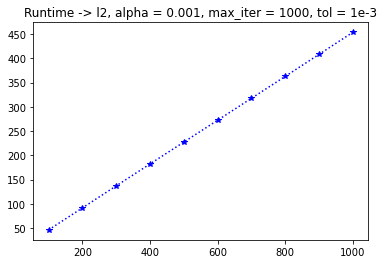

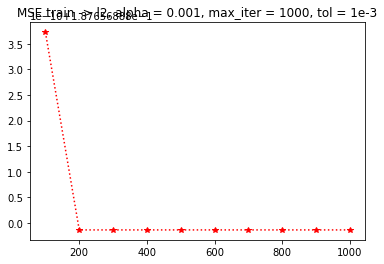

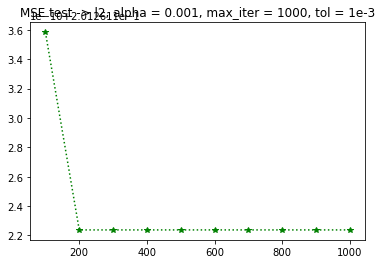

In [19]:
plt.plot(np.arange(100, 1001, 100), runtime_list_4[1:], 'b*:')
plt.title("Runtime -> l2, alpha = 0.001, max_iter = 1000, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_train_list_4[1:], 'r*:')
plt.title("MSE train -> l2, alpha = 0.001, max_iter = 1000, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_test_list_4[1:], 'g*:')
plt.title("MSE test -> l2, alpha = 0.001, max_iter = 1000, tol = 1e-3")
plt.show()

### Case E:

In [20]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


# Initialize SGD regressor object
# We will run gradient descent using the SGDRegressor sklearn object
gd             = SGDRegressor(
                                    fit_intercept   = False,
                                    penalty = "l2",
                                    alpha           = 0.1,
                                    max_iter        = 1000,
                                    learning_rate   = 'constant',
                                    tol             = 1e-3,
                                    random_state    = 1000)

print('Gradient Descent:')
print('{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}'.format('Iteration','Train MSE','Test MSE','Train R-square','Test R-square','Tot runtime'))

start = time.time()
# Create an list to store the per iteration run time
per_iter_runtime_list = []
runtime_list_5 = []
MSE_train_list_5 = []
MSE_test_list_5 = []
# Max number of iterations set to 1000
for _ in range(1001):

    per_iter_start   = time.time()
    
    # This line of code executes one iteration of gradient descent
    # If you want to implement mini-batch, just modify this code
    # so that input is the sampled batch of rows as opposed to
    # the full training set
    gd.partial_fit(X_train, y_train)
    per_iter_runtime = time.time() - per_iter_start
    per_iter_runtime_list.append(per_iter_runtime)

    # The if statement here will execute every 100 iterations
    if _%100==0:
        
        gd_train_error          = mean_squared_error(gd.predict(X_train), y_train)
        gd_test_error           = mean_squared_error(gd.predict(X_test), y_test)
        gd_r_square_train       = gd.score(X_train, y_train)    
        gd_r_square_test        = gd.score(X_test, y_test)   
        print('{:>15.0f}{:>15.4f}{:>15.4f}{:>15.4f}{:>15.1f}{:>15.1f}'.format(_,gd_train_error,gd_test_error,gd_r_square_train,gd_r_square_test,time.time()-start))
        runtime_list_5.append(time.time()-start)
        MSE_train_list_5.append(gd_train_error)
        MSE_test_list_5.append(gd_test_error)
print('Per update runtime:{:>15.3f}'.format(np.mean(per_iter_runtime_list)))

Gradient Descent:
      Iteration      Train MSE       Test MSE Train R-square  Test R-square    Tot runtime
              0         0.8913         1.2418        -1.2295           -3.3            1.1
            100         0.8913         1.2418        -1.2295           -3.3           46.3
            200         0.8913         1.2418        -1.2295           -3.3           91.4
            300         0.8913         1.2418        -1.2295           -3.3          139.5
            400         0.8913         1.2418        -1.2295           -3.3          185.0
            500         0.8913         1.2418        -1.2295           -3.3          230.6
            600         0.8913         1.2418        -1.2295           -3.3          275.9
            700         0.8913         1.2418        -1.2295           -3.3          321.5
            800         0.8913         1.2418        -1.2295           -3.3          367.1
            900         0.8913         1.2418        -1.2295           -

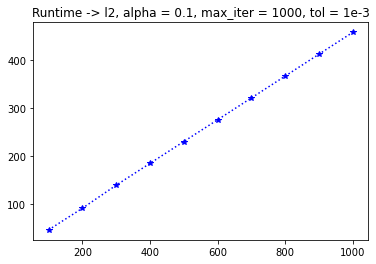

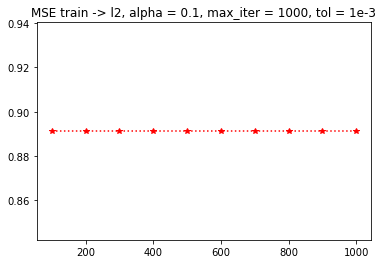

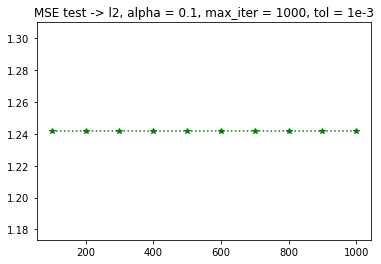

In [21]:
plt.plot(np.arange(100, 1001, 100), runtime_list_5[1:], 'b*:')
plt.title("Runtime -> l2, alpha = 0.1, max_iter = 1000, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_train_list_5[1:], 'r*:')
plt.title("MSE train -> l2, alpha = 0.1, max_iter = 1000, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_test_list_5[1:], 'g*:')
plt.title("MSE test -> l2, alpha = 0.1, max_iter = 1000, tol = 1e-3")
plt.show()

### Case F:

In [22]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


# Initialize SGD regressor object
# We will run gradient descent using the SGDRegressor sklearn object
gd             = SGDRegressor(
                                    fit_intercept   = False,
                                    penalty = "l2",
                                    alpha           = 1.0,
                                    max_iter        = 1000,
                                    learning_rate   = 'constant',
                                    tol             = 1e-3,
                                    random_state    = 1000)

print('Gradient Descent:')
print('{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}'.format('Iteration','Train MSE','Test MSE','Train R-square','Test R-square','Tot runtime'))

start = time.time()
# Create an list to store the per iteration run time
per_iter_runtime_list = []
runtime_list_6 = []
MSE_train_list_6 = []
MSE_test_list_6 = []
# Max number of iterations set to 1000
for _ in range(1001):

    per_iter_start   = time.time()
    
    # This line of code executes one iteration of gradient descent
    # If you want to implement mini-batch, just modify this code
    # so that input is the sampled batch of rows as opposed to
    # the full training set
    gd.partial_fit(X_train, y_train)
    per_iter_runtime = time.time() - per_iter_start
    per_iter_runtime_list.append(per_iter_runtime)

    # The if statement here will execute every 100 iterations
    if _%100==0:
        
        gd_train_error          = mean_squared_error(gd.predict(X_train), y_train)
        gd_test_error           = mean_squared_error(gd.predict(X_test), y_test)
        gd_r_square_train       = gd.score(X_train, y_train)    
        gd_r_square_test        = gd.score(X_test, y_test)   
        print('{:>15.0f}{:>15.4f}{:>15.4f}{:>15.4f}{:>15.1f}{:>15.1f}'.format(_,gd_train_error,gd_test_error,gd_r_square_train,gd_r_square_test,time.time()-start))
        runtime_list_6.append(time.time()-start)
        MSE_train_list_6.append(gd_train_error)
        MSE_test_list_6.append(gd_test_error)
print('Per update runtime:{:>15.3f}'.format(np.mean(per_iter_runtime_list)))

Gradient Descent:
      Iteration      Train MSE       Test MSE Train R-square  Test R-square    Tot runtime
              0         6.6048         8.0456       -15.5211          -26.8            1.2
            100         6.6048         8.0456       -15.5211          -26.8           51.4
            200         6.6048         8.0456       -15.5211          -26.8          103.2
            300         6.6048         8.0456       -15.5211          -26.8          152.7
            400         6.6048         8.0456       -15.5211          -26.8          201.0
            500         6.6048         8.0456       -15.5211          -26.8          248.9
            600         6.6048         8.0456       -15.5211          -26.8          296.4
            700         6.6048         8.0456       -15.5211          -26.8          343.5
            800         6.6048         8.0456       -15.5211          -26.8          391.4
            900         6.6048         8.0456       -15.5211          -2

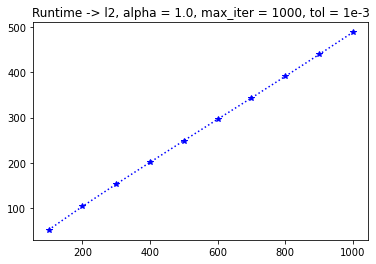

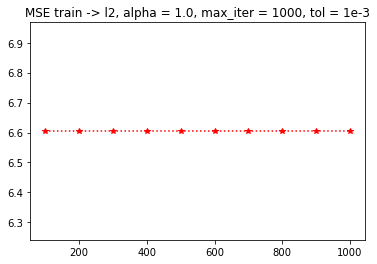

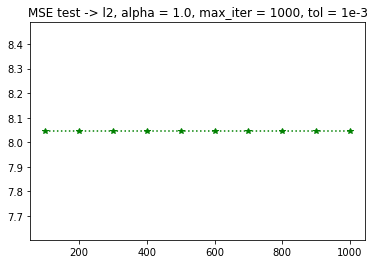

In [23]:
plt.plot(np.arange(100, 1001, 100), runtime_list_6[1:], 'b*:')
plt.title("Runtime -> l2, alpha = 1.0, max_iter = 1000, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_train_list_6[1:], 'r*:')
plt.title("MSE train -> l2, alpha = 1.0, max_iter = 1000, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_test_list_6[1:], 'g*:')
plt.title("MSE test -> l2, alpha = 1.0, max_iter = 1000, tol = 1e-3")
plt.show()

### Case G:

In [24]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


# Initialize SGD regressor object
# We will run gradient descent using the SGDRegressor sklearn object
gd             = SGDRegressor(
                                    fit_intercept   = False,
                                    penalty = "l1",
                                    alpha           = 0.00001,
                                    max_iter        = 1000,
                                    learning_rate   = 'constant',
                                    tol             = 1e-3,
                                    random_state    = 1000)

print('Gradient Descent:')
print('{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}'.format('Iteration','Train MSE','Test MSE','Train R-square','Test R-square','Tot runtime'))

start = time.time()
# Create an list to store the per iteration run time
per_iter_runtime_list = []
runtime_list_7 = []
MSE_train_list_7 = []
MSE_test_list_7 = []
# Max number of iterations set to 1000
for _ in range(1001):

    per_iter_start   = time.time()
    
    # This line of code executes one iteration of gradient descent
    # If you want to implement mini-batch, just modify this code
    # so that input is the sampled batch of rows as opposed to
    # the full training set
    gd.partial_fit(X_train, y_train)
    per_iter_runtime = time.time() - per_iter_start
    per_iter_runtime_list.append(per_iter_runtime)

    # The if statement here will execute every 100 iterations
    if _%100==0:
        
        gd_train_error          = mean_squared_error(gd.predict(X_train), y_train)
        gd_test_error           = mean_squared_error(gd.predict(X_test), y_test)
        gd_r_square_train       = gd.score(X_train, y_train)    
        gd_r_square_test        = gd.score(X_test, y_test)   
        print('{:>15.0f}{:>15.4f}{:>15.4f}{:>15.4f}{:>15.1f}{:>15.1f}'.format(_,gd_train_error,gd_test_error,gd_r_square_train,gd_r_square_test,time.time()-start))
        runtime_list_7.append(time.time()-start)
        MSE_train_list_7.append(gd_train_error)
        MSE_test_list_7.append(gd_test_error)
print('Per update runtime:{:>15.3f}'.format(np.mean(per_iter_runtime_list)))

Gradient Descent:
      Iteration      Train MSE       Test MSE Train R-square  Test R-square    Tot runtime
              0         0.2744         0.2768         0.3137            0.0            1.7
            100         0.1127         0.1509         0.7181            0.5          127.5
            200         0.1015         0.1472         0.7461            0.5          253.7
            300         0.0965         0.1457         0.7585            0.5          379.7
            400         0.0937         0.1449         0.7656            0.5          504.7
            500         0.0918         0.1444         0.7703            0.5          629.7
            600         0.0905         0.1441         0.7737            0.5          754.2
            700         0.0895         0.1439         0.7762            0.5          878.6
            800         0.0886         0.1437         0.7783            0.5         1002.8
            900         0.0880         0.1436         0.7799            

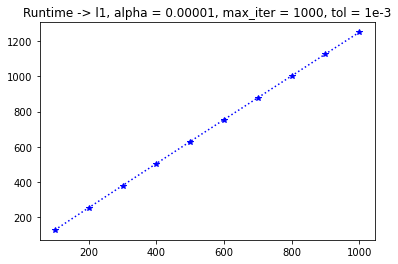

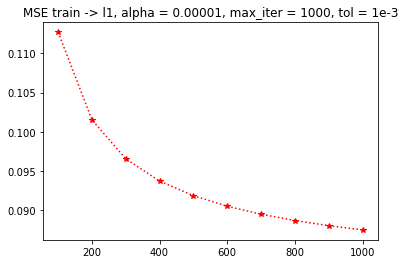

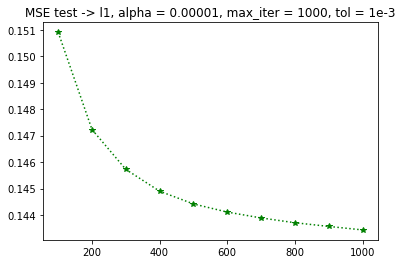

In [25]:
plt.plot(np.arange(100, 1001, 100), runtime_list_7[1:], 'b*:')
plt.title("Runtime -> l1, alpha = 0.00001, max_iter = 1000, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_train_list_7[1:], 'r*:')
plt.title("MSE train -> l1, alpha = 0.00001, max_iter = 1000, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_test_list_7[1:], 'g*:')
plt.title("MSE test -> l1, alpha = 0.00001, max_iter = 1000, tol = 1e-3")
plt.show()

### Case H:

In [26]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


# Initialize SGD regressor object
# We will run gradient descent using the SGDRegressor sklearn object
gd             = SGDRegressor(
                                    fit_intercept   = False,
                                    penalty = "l1",
                                    alpha           = 0.0001,
                                    max_iter        = 1000,
                                    learning_rate   = 'constant',
                                    tol             = 1e-3,
                                    random_state    = 1000)

print('Gradient Descent:')
print('{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}'.format('Iteration','Train MSE','Test MSE','Train R-square','Test R-square','Tot runtime'))

start = time.time()
# Create an list to store the per iteration run time
per_iter_runtime_list = []
runtime_list_8 = []
MSE_train_list_8 = []
MSE_test_list_8 = []
# Max number of iterations set to 1000
for _ in range(1001):

    per_iter_start   = time.time()
    
    # This line of code executes one iteration of gradient descent
    # If you want to implement mini-batch, just modify this code
    # so that input is the sampled batch of rows as opposed to
    # the full training set
    gd.partial_fit(X_train, y_train)
    per_iter_runtime = time.time() - per_iter_start
    per_iter_runtime_list.append(per_iter_runtime)

    # The if statement here will execute every 100 iterations
    if _%100==0:
        
        gd_train_error          = mean_squared_error(gd.predict(X_train), y_train)
        gd_test_error           = mean_squared_error(gd.predict(X_test), y_test)
        gd_r_square_train       = gd.score(X_train, y_train)    
        gd_r_square_test        = gd.score(X_test, y_test)   
        print('{:>15.0f}{:>15.4f}{:>15.4f}{:>15.4f}{:>15.1f}{:>15.1f}'.format(_,gd_train_error,gd_test_error,gd_r_square_train,gd_r_square_test,time.time()-start))
        runtime_list_8.append(time.time()-start)
        MSE_train_list_8.append(gd_train_error)
        MSE_test_list_8.append(gd_test_error)
print('Per update runtime:{:>15.3f}'.format(np.mean(per_iter_runtime_list)))

Gradient Descent:
      Iteration      Train MSE       Test MSE Train R-square  Test R-square    Tot runtime
              0         0.2925         0.2976         0.2684           -0.0            1.7
            100         0.1548         0.1693         0.6129            0.4          105.6
            200         0.1487         0.1660         0.6281            0.4          205.5
            300         0.1467         0.1654         0.6332            0.4          305.2
            400         0.1456         0.1652         0.6359            0.4          404.8
            500         0.1449         0.1651         0.6375            0.4          504.6
            600         0.1445         0.1650         0.6386            0.4          604.1
            700         0.1442         0.1649         0.6393            0.4          704.0
            800         0.1440         0.1649         0.6399            0.4          803.8
            900         0.1438         0.1648         0.6404            

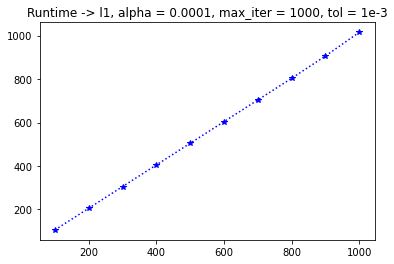

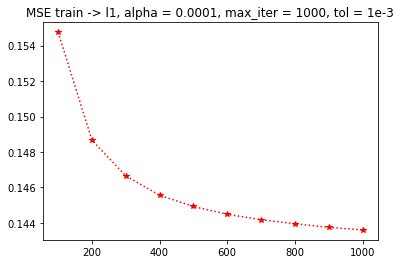

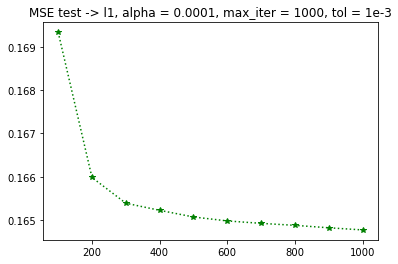

In [27]:
plt.plot(np.arange(100, 1001, 100), runtime_list_8[1:], 'b*:')
plt.title("Runtime -> l1, alpha = 0.0001, max_iter = 1000, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_train_list_8[1:], 'r*:')
plt.title("MSE train -> l1, alpha = 0.0001, max_iter = 1000, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_test_list_8[1:], 'g*:')
plt.title("MSE test -> l1, alpha = 0.0001, max_iter = 1000, tol = 1e-3")
plt.show()

### Case I:

In [28]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


# Initialize SGD regressor object
# We will run gradient descent using the SGDRegressor sklearn object
gd             = SGDRegressor(
                                    fit_intercept   = False,
                                    penalty = "l1",
                                    alpha           = 0.01,
                                    max_iter        = 1000,
                                    learning_rate   = 'constant',
                                    tol             = 1e-3,
                                    random_state    = 1000)

print('Gradient Descent:')
print('{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}'.format('Iteration','Train MSE','Test MSE','Train R-square','Test R-square','Tot runtime'))

start = time.time()
# Create an list to store the per iteration run time
per_iter_runtime_list = []
runtime_list_9 = []
MSE_train_list_9 = []
MSE_test_list_9 = []
# Max number of iterations set to 1000
for _ in range(1001):

    per_iter_start   = time.time()
    
    # This line of code executes one iteration of gradient descent
    # If you want to implement mini-batch, just modify this code
    # so that input is the sampled batch of rows as opposed to
    # the full training set
    gd.partial_fit(X_train, y_train)
    per_iter_runtime = time.time() - per_iter_start
    per_iter_runtime_list.append(per_iter_runtime)

    # The if statement here will execute every 100 iterations
    if _%100==0:
        
        gd_train_error          = mean_squared_error(gd.predict(X_train), y_train)
        gd_test_error           = mean_squared_error(gd.predict(X_test), y_test)
        gd_r_square_train       = gd.score(X_train, y_train)    
        gd_r_square_test        = gd.score(X_test, y_test)   
        print('{:>15.0f}{:>15.4f}{:>15.4f}{:>15.4f}{:>15.1f}{:>15.1f}'.format(_,gd_train_error,gd_test_error,gd_r_square_train,gd_r_square_test,time.time()-start))
        runtime_list_9.append(time.time()-start)
        MSE_train_list_9.append(gd_train_error)
        MSE_test_list_9.append(gd_test_error)
print('Per update runtime:{:>15.3f}'.format(np.mean(per_iter_runtime_list)))

Gradient Descent:
      Iteration      Train MSE       Test MSE Train R-square  Test R-square    Tot runtime
              0         0.6942         0.9620        -0.7365           -2.3            1.7
            100         0.8132         1.0464        -1.0342           -2.6           97.5
            200         0.8248         1.0595        -1.0633           -2.7          190.2
            300         0.8298         1.0646        -1.0756           -2.7          283.4
            400         0.8319         1.0663        -1.0810           -2.7          375.8
            500         0.8338         1.0678        -1.0856           -2.7          467.7
            600         0.8353         1.0691        -1.0895           -2.7          560.1
            700         0.8366         1.0702        -1.0928           -2.7          653.1
            800         0.8377         1.0712        -1.0955           -2.7          745.6
            900         0.8387         1.0720        -1.0978           -

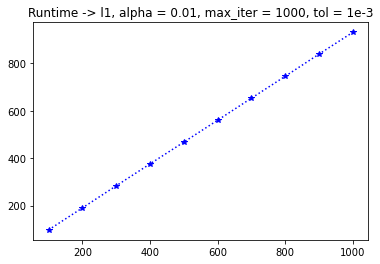

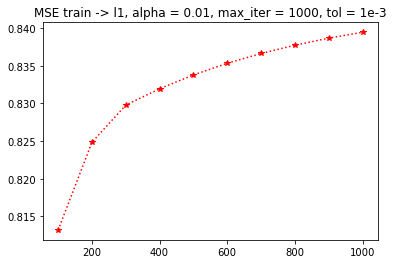

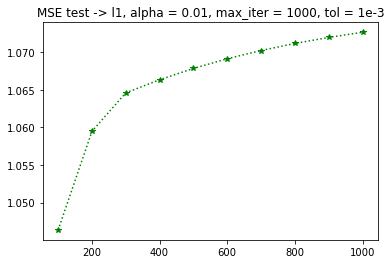

In [29]:
plt.plot(np.arange(100, 1001, 100), runtime_list_9[1:], 'b*:')
plt.title("Runtime -> l1, alpha = 0.01, max_iter = 1000, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_train_list_9[1:], 'r*:')
plt.title("MSE train -> l1, alpha = 0.01, max_iter = 1000, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_test_list_9[1:], 'g*:')
plt.title("MSE test -> l1, alpha = 0.01, max_iter = 1000, tol = 1e-3")
plt.show()

### Case J:

In [30]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


# Initialize SGD regressor object
# We will run gradient descent using the SGDRegressor sklearn object
gd             = SGDRegressor(
                                    fit_intercept   = False,
                                    penalty = "l2",
                                    alpha           = 0.0,
                                    max_iter        = 1000,
                                    learning_rate   = 'constant',
                                    tol             = 1e-4,
                                    random_state    = 1000)

print('Gradient Descent:')
print('{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}'.format('Iteration','Train MSE','Test MSE','Train R-square','Test R-square','Tot runtime'))

start = time.time()
# Create an list to store the per iteration run time
per_iter_runtime_list = []
runtime_list_10 = []
MSE_train_list_10 = []
MSE_test_list_10 = []
# Max number of iterations set to 1000
for _ in range(1001):

    per_iter_start   = time.time()
    
    # This line of code executes one iteration of gradient descent
    # If you want to implement mini-batch, just modify this code
    # so that input is the sampled batch of rows as opposed to
    # the full training set
    gd.partial_fit(X_train, y_train)
    per_iter_runtime = time.time() - per_iter_start
    per_iter_runtime_list.append(per_iter_runtime)

    # The if statement here will execute every 100 iterations
    if _%100==0:
        
        gd_train_error          = mean_squared_error(gd.predict(X_train), y_train)
        gd_test_error           = mean_squared_error(gd.predict(X_test), y_test)
        gd_r_square_train       = gd.score(X_train, y_train)    
        gd_r_square_test        = gd.score(X_test, y_test)   
        print('{:>15.0f}{:>15.4f}{:>15.4f}{:>15.4f}{:>15.1f}{:>15.1f}'.format(_,gd_train_error,gd_test_error,gd_r_square_train,gd_r_square_test,time.time()-start))
        runtime_list_10.append(time.time()-start)
        MSE_train_list_10.append(gd_train_error)
        MSE_test_list_10.append(gd_test_error)
print('Per update runtime:{:>15.3f}'.format(np.mean(per_iter_runtime_list)))

Gradient Descent:
      Iteration      Train MSE       Test MSE Train R-square  Test R-square    Tot runtime
              0         0.2702         0.2731         0.3241            0.1            1.1
            100         0.0650         0.1421         0.8374            0.5           47.2
            200         0.0414         0.1386         0.8965            0.5           92.7
            300         0.0298         0.1381         0.9255            0.5          138.4
            400         0.0228         0.1384         0.9431            0.5          184.1
            500         0.0180         0.1389         0.9549            0.5          229.6
            600         0.0147         0.1396         0.9633            0.5          275.3
            700         0.0121         0.1403         0.9696            0.5          321.0
            800         0.0102         0.1409         0.9745            0.5          366.8
            900         0.0087         0.1416         0.9784            

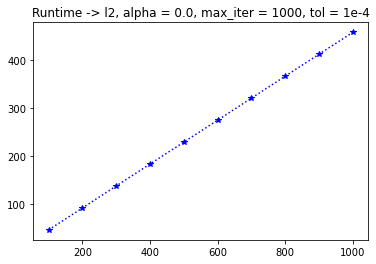

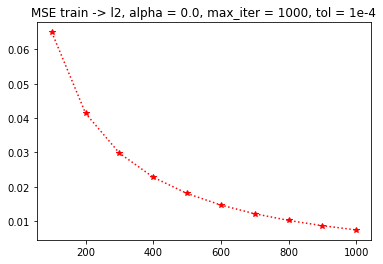

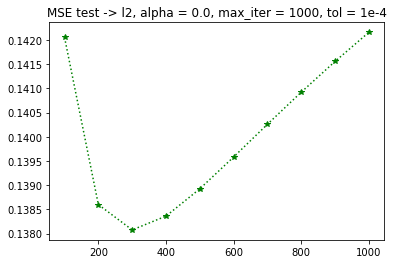

In [31]:
plt.plot(np.arange(100, 1001, 100), runtime_list_10[1:], 'b*:')
plt.title("Runtime -> l2, alpha = 0.0, max_iter = 1000, tol = 1e-4")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_train_list_10[1:], 'r*:')
plt.title("MSE train -> l2, alpha = 0.0, max_iter = 1000, tol = 1e-4")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_test_list_10[1:], 'g*:')
plt.title("MSE test -> l2, alpha = 0.0, max_iter = 1000, tol = 1e-4")
plt.show()

### Case K:

In [32]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


# Initialize SGD regressor object
# We will run gradient descent using the SGDRegressor sklearn object
gd             = SGDRegressor(
                                    fit_intercept   = False,
                                    penalty = "l2",
                                    alpha           = 0.0,
                                    max_iter        = 1000,
                                    learning_rate   = 'constant',
                                    tol             = 1e-2,
                                    random_state    = 1000)

print('Gradient Descent:')
print('{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}'.format('Iteration','Train MSE','Test MSE','Train R-square','Test R-square','Tot runtime'))

start = time.time()
# Create an list to store the per iteration run time
per_iter_runtime_list = []
runtime_list_11 = []
MSE_train_list_11 = []
MSE_test_list_11 = []
# Max number of iterations set to 1000
for _ in range(1001):

    per_iter_start   = time.time()
    
    # This line of code executes one iteration of gradient descent
    # If you want to implement mini-batch, just modify this code
    # so that input is the sampled batch of rows as opposed to
    # the full training set
    gd.partial_fit(X_train, y_train)
    per_iter_runtime = time.time() - per_iter_start
    per_iter_runtime_list.append(per_iter_runtime)

    # The if statement here will execute every 100 iterations
    if _%100==0:
        
        gd_train_error          = mean_squared_error(gd.predict(X_train), y_train)
        gd_test_error           = mean_squared_error(gd.predict(X_test), y_test)
        gd_r_square_train       = gd.score(X_train, y_train)    
        gd_r_square_test        = gd.score(X_test, y_test)   
        print('{:>15.0f}{:>15.4f}{:>15.4f}{:>15.4f}{:>15.1f}{:>15.1f}'.format(_,gd_train_error,gd_test_error,gd_r_square_train,gd_r_square_test,time.time()-start))
        runtime_list_11.append(time.time()-start)
        MSE_train_list_11.append(gd_train_error)
        MSE_test_list_11.append(gd_test_error)
print('Per update runtime:{:>15.3f}'.format(np.mean(per_iter_runtime_list)))

Gradient Descent:
      Iteration      Train MSE       Test MSE Train R-square  Test R-square    Tot runtime
              0         0.2702         0.2731         0.3241            0.1            1.1
            100         0.0650         0.1421         0.8374            0.5           46.8
            200         0.0414         0.1386         0.8965            0.5           92.6
            300         0.0298         0.1381         0.9255            0.5          138.3
            400         0.0228         0.1384         0.9431            0.5          184.1
            500         0.0180         0.1389         0.9549            0.5          229.8
            600         0.0147         0.1396         0.9633            0.5          275.5
            700         0.0121         0.1403         0.9696            0.5          321.3
            800         0.0102         0.1409         0.9745            0.5          367.0
            900         0.0087         0.1416         0.9784            

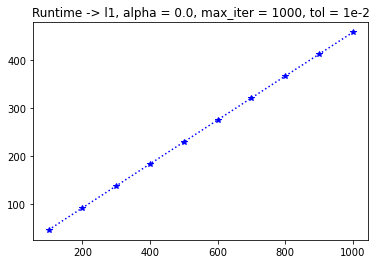

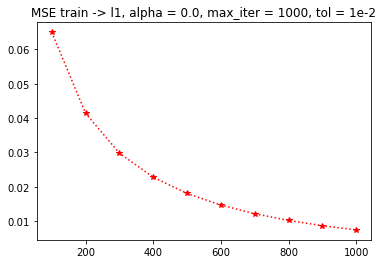

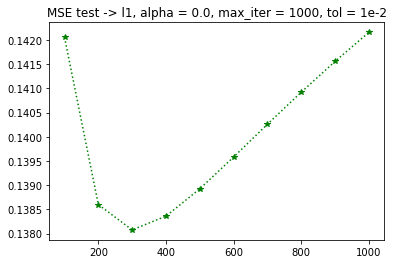

In [33]:
plt.plot(np.arange(100, 1001, 100), runtime_list_11[1:], 'b*:')
plt.title("Runtime -> l1, alpha = 0.0, max_iter = 1000, tol = 1e-2")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_train_list_11[1:], 'r*:')
plt.title("MSE train -> l1, alpha = 0.0, max_iter = 1000, tol = 1e-2")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_test_list_11[1:], 'g*:')
plt.title("MSE test -> l1, alpha = 0.0, max_iter = 1000, tol = 1e-2")
plt.show()

### Case L:

In [34]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


# Initialize SGD regressor object
# We will run gradient descent using the SGDRegressor sklearn object
gd             = SGDRegressor(
                                    fit_intercept   = False,
                                    penalty = "l2",
                                    alpha           = 0.0,
                                    max_iter        = 100,
                                    learning_rate   = 'constant',
                                    tol             = 1e-3,
                                    random_state    = 1000)

print('Gradient Descent:')
print('{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}'.format('Iteration','Train MSE','Test MSE','Train R-square','Test R-square','Tot runtime'))

start = time.time()
# Create an list to store the per iteration run time
per_iter_runtime_list = []
runtime_list_12 = []
MSE_train_list_12 = []
MSE_test_list_12 = []
# Max number of iterations set to 1000
for _ in range(1001):

    per_iter_start   = time.time()
    
    # This line of code executes one iteration of gradient descent
    # If you want to implement mini-batch, just modify this code
    # so that input is the sampled batch of rows as opposed to
    # the full training set
    gd.partial_fit(X_train, y_train)
    per_iter_runtime = time.time() - per_iter_start
    per_iter_runtime_list.append(per_iter_runtime)

    # The if statement here will execute every 100 iterations
    if _%100==0:
        
        gd_train_error          = mean_squared_error(gd.predict(X_train), y_train)
        gd_test_error           = mean_squared_error(gd.predict(X_test), y_test)
        gd_r_square_train       = gd.score(X_train, y_train)    
        gd_r_square_test        = gd.score(X_test, y_test)   
        print('{:>15.0f}{:>15.4f}{:>15.4f}{:>15.4f}{:>15.1f}{:>15.1f}'.format(_,gd_train_error,gd_test_error,gd_r_square_train,gd_r_square_test,time.time()-start))
        runtime_list_12.append(time.time()-start)
        MSE_train_list_12.append(gd_train_error)
        MSE_test_list_12.append(gd_test_error)
print('Per update runtime:{:>15.3f}'.format(np.mean(per_iter_runtime_list)))

Gradient Descent:
      Iteration      Train MSE       Test MSE Train R-square  Test R-square    Tot runtime
              0         0.2702         0.2731         0.3241            0.1            1.1
            100         0.0650         0.1421         0.8374            0.5           46.8
            200         0.0414         0.1386         0.8965            0.5           92.7
            300         0.0298         0.1381         0.9255            0.5          138.6
            400         0.0228         0.1384         0.9431            0.5          184.2
            500         0.0180         0.1389         0.9549            0.5          234.2
            600         0.0147         0.1396         0.9633            0.5          285.8
            700         0.0121         0.1403         0.9696            0.5          334.3
            800         0.0102         0.1409         0.9745            0.5          382.5
            900         0.0087         0.1416         0.9784            

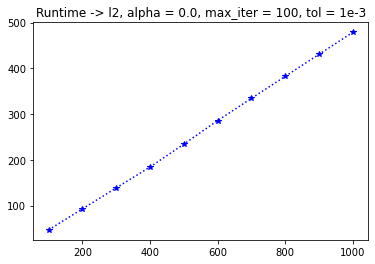

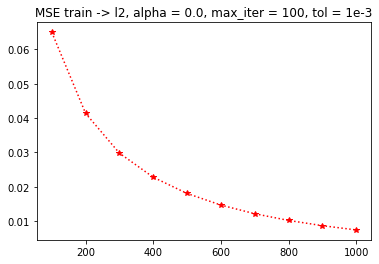

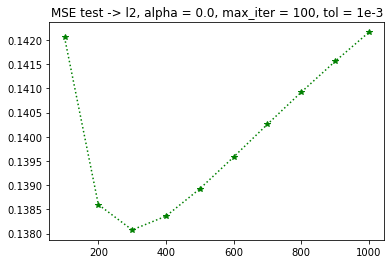

In [35]:
plt.plot(np.arange(100, 1001, 100), runtime_list_12[1:], 'b*:')
plt.title("Runtime -> l2, alpha = 0.0, max_iter = 100, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_train_list_12[1:], 'r*:')
plt.title("MSE train -> l2, alpha = 0.0, max_iter = 100, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_test_list_12[1:], 'g*:')
plt.title("MSE test -> l2, alpha = 0.0, max_iter = 100, tol = 1e-3")
plt.show()

### Case M:

In [36]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


# Initialize SGD regressor object
# We will run gradient descent using the SGDRegressor sklearn object
gd             = SGDRegressor(
                                    fit_intercept   = False,
                                    penalty = "l2",
                                    alpha           = 0.0,
                                    max_iter        = 500,
                                    learning_rate   = 'constant',
                                    tol             = 1e-3,
                                    random_state    = 1000)

print('Gradient Descent:')
print('{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}'.format('Iteration','Train MSE','Test MSE','Train R-square','Test R-square','Tot runtime'))

start = time.time()
# Create an list to store the per iteration run time
per_iter_runtime_list = []
runtime_list_13 = []
MSE_train_list_13 = []
MSE_test_list_13 = []
# Max number of iterations set to 1000
for _ in range(1001):

    per_iter_start   = time.time()
    
    # This line of code executes one iteration of gradient descent
    # If you want to implement mini-batch, just modify this code
    # so that input is the sampled batch of rows as opposed to
    # the full training set
    gd.partial_fit(X_train, y_train)
    per_iter_runtime = time.time() - per_iter_start
    per_iter_runtime_list.append(per_iter_runtime)

    # The if statement here will execute every 100 iterations
    if _%100==0:
        
        gd_train_error          = mean_squared_error(gd.predict(X_train), y_train)
        gd_test_error           = mean_squared_error(gd.predict(X_test), y_test)
        gd_r_square_train       = gd.score(X_train, y_train)    
        gd_r_square_test        = gd.score(X_test, y_test)   
        print('{:>15.0f}{:>15.4f}{:>15.4f}{:>15.4f}{:>15.1f}{:>15.1f}'.format(_,gd_train_error,gd_test_error,gd_r_square_train,gd_r_square_test,time.time()-start))
        runtime_list_13.append(time.time()-start)
        MSE_train_list_13.append(gd_train_error)
        MSE_test_list_13.append(gd_test_error)
print('Per update runtime:{:>15.3f}'.format(np.mean(per_iter_runtime_list)))

Gradient Descent:
      Iteration      Train MSE       Test MSE Train R-square  Test R-square    Tot runtime
              0         0.2702         0.2731         0.3241            0.1            1.2
            100         0.0650         0.1421         0.8374            0.5           51.0
            200         0.0414         0.1386         0.8965            0.5          108.5
            300         0.0298         0.1381         0.9255            0.5          165.5
            400         0.0228         0.1384         0.9431            0.5          218.0
            500         0.0180         0.1389         0.9549            0.5          267.3
            600         0.0147         0.1396         0.9633            0.5          314.9
            700         0.0121         0.1403         0.9696            0.5          362.4
            800         0.0102         0.1409         0.9745            0.5          411.8
            900         0.0087         0.1416         0.9784            

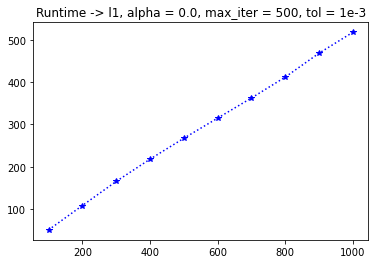

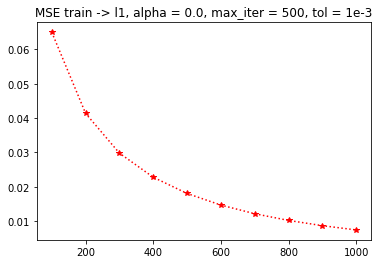

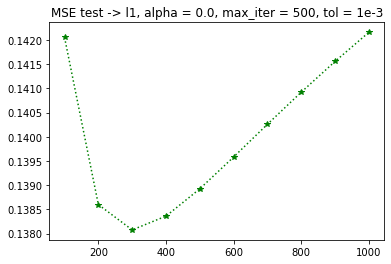

In [37]:
plt.plot(np.arange(100, 1001, 100), runtime_list_13[1:], 'b*:')
plt.title("Runtime -> l1, alpha = 0.0, max_iter = 500, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_train_list_13[1:], 'r*:')
plt.title("MSE train -> l1, alpha = 0.0, max_iter = 500, tol = 1e-3")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_test_list_13[1:], 'g*:')
plt.title("MSE test -> l1, alpha = 0.0, max_iter = 500, tol = 1e-3")
plt.show()

### Case N:

In [38]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


# Initialize SGD regressor object
# We will run gradient descent using the SGDRegressor sklearn object
gd             = SGDRegressor(
                                    fit_intercept   = False,
                                    penalty = "l2",
                                    alpha           = 0.0,
                                    max_iter        = 1000,
                                    learning_rate   = 'adaptive',
                                    tol             = 1e-3,
                                    random_state    = 1000)

print('Gradient Descent:')
print('{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}'.format('Iteration','Train MSE','Test MSE','Train R-square','Test R-square','Tot runtime'))

start = time.time()
# Create an list to store the per iteration run time
per_iter_runtime_list = []
runtime_list_14 = []
MSE_train_list_14 = []
MSE_test_list_14 = []
# Max number of iterations set to 1000
for _ in range(1001):

    per_iter_start   = time.time()
    
    # This line of code executes one iteration of gradient descent
    # If you want to implement mini-batch, just modify this code
    # so that input is the sampled batch of rows as opposed to
    # the full training set
    gd.partial_fit(X_train, y_train)
    per_iter_runtime = time.time() - per_iter_start
    per_iter_runtime_list.append(per_iter_runtime)

    # The if statement here will execute every 100 iterations
    if _%100==0:
        
        gd_train_error          = mean_squared_error(gd.predict(X_train), y_train)
        gd_test_error           = mean_squared_error(gd.predict(X_test), y_test)
        gd_r_square_train       = gd.score(X_train, y_train)    
        gd_r_square_test        = gd.score(X_test, y_test)   
        print('{:>15.0f}{:>15.4f}{:>15.4f}{:>15.4f}{:>15.1f}{:>15.1f}'.format(_,gd_train_error,gd_test_error,gd_r_square_train,gd_r_square_test,time.time()-start))
        runtime_list_14.append(time.time()-start)
        MSE_train_list_14.append(gd_train_error)
        MSE_test_list_14.append(gd_test_error)
print('Per update runtime:{:>15.3f}'.format(np.mean(per_iter_runtime_list)))

Gradient Descent:
      Iteration      Train MSE       Test MSE Train R-square  Test R-square    Tot runtime
              0         0.2702         0.2731         0.3241            0.1            1.1
            100         0.0650         0.1421         0.8374            0.5           52.0
            200         0.0414         0.1386         0.8965            0.5          102.5
            300         0.0298         0.1381         0.9255            0.5          153.2
            400         0.0228         0.1384         0.9431            0.5          200.5
            500         0.0180         0.1389         0.9549            0.5          249.8
            600         0.0147         0.1396         0.9633            0.5          301.4
            700         0.0121         0.1403         0.9696            0.5          357.3
            800         0.0102         0.1409         0.9745            0.5          407.2
            900         0.0087         0.1416         0.9784            

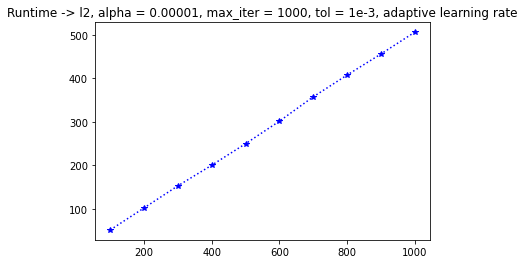

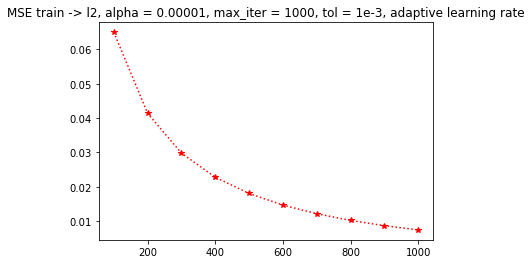

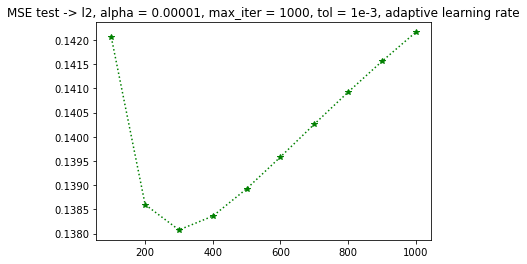

In [39]:
plt.plot(np.arange(100, 1001, 100), runtime_list_14[1:], 'b*:')
plt.title("Runtime -> l2, alpha = 0.00001, max_iter = 1000, tol = 1e-3, adaptive learning rate")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_train_list_14[1:], 'r*:')
plt.title("MSE train -> l2, alpha = 0.00001, max_iter = 1000, tol = 1e-3, adaptive learning rate")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_test_list_14[1:], 'g*:')
plt.title("MSE test -> l2, alpha = 0.00001, max_iter = 1000, tol = 1e-3, adaptive learning rate")
plt.show()

### Case O:

In [77]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


# Initialize SGD regressor object
# We will run gradient descent using the SGDRegressor sklearn object
gd             = SGDRegressor(
                                    fit_intercept   = False,
                                    penalty = "elasticnet",
                                    alpha           = 0.00001,
                                    max_iter        = 1000,
                                    learning_rate   = 'constant',
                                    tol             = 1e-3,
                                    random_state    = 1000)

print('Gradient Descent:')
print('{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}'.format('Iteration','Train MSE','Test MSE','Train R-square','Test R-square','Tot runtime'))

start = time.time()
# Create an list to store the per iteration run time
per_iter_runtime_list = []
runtime_list_15 = []
MSE_train_list_15 = []
MSE_test_list_15 = []
# Max number of iterations set to 1000
for _ in range(1001):

    per_iter_start   = time.time()
    
    # This line of code executes one iteration of gradient descent
    # If you want to implement mini-batch, just modify this code
    # so that input is the sampled batch of rows as opposed to
    # the full training set
    gd.partial_fit(X_train, y_train)
    per_iter_runtime = time.time() - per_iter_start
    per_iter_runtime_list.append(per_iter_runtime)

    # The if statement here will execute every 100 iterations
    if _%100==0:
        
        gd_train_error          = mean_squared_error(gd.predict(X_train), y_train)
        gd_test_error           = mean_squared_error(gd.predict(X_test), y_test)
        gd_r_square_train       = gd.score(X_train, y_train)    
        gd_r_square_test        = gd.score(X_test, y_test)   
        print('{:>15.0f}{:>15.4f}{:>15.4f}{:>15.4f}{:>15.1f}{:>15.1f}'.format(_,gd_train_error,gd_test_error,gd_r_square_train,gd_r_square_test,time.time()-start))
        runtime_list_15.append(time.time()-start)
        MSE_train_list_15.append(gd_train_error)
        MSE_test_list_15.append(gd_test_error)
print('Per update runtime:{:>15.3f}'.format(np.mean(per_iter_runtime_list)))

Gradient Descent:
      Iteration      Train MSE       Test MSE Train R-square  Test R-square    Tot runtime
              0         0.2712         0.2738         0.3216            0.1            5.6
            100         0.0848         0.1457         0.7880            0.5          134.7
            200         0.0675         0.1421         0.8311            0.5          273.0
            300         0.0597         0.1409         0.8506            0.5          408.6
            400         0.0553         0.1404         0.8616            0.5          545.4
            500         0.0526         0.1402         0.8685            0.5          682.0
            600         0.0507         0.1401         0.8731            0.5          818.2
            700         0.0495         0.1400         0.8763            0.5          954.6
            800         0.0485         0.1400         0.8786            0.5         1092.7
            900         0.0479         0.1399         0.8803            

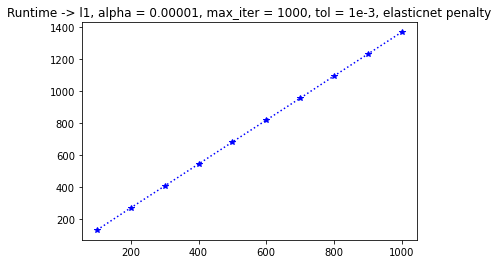

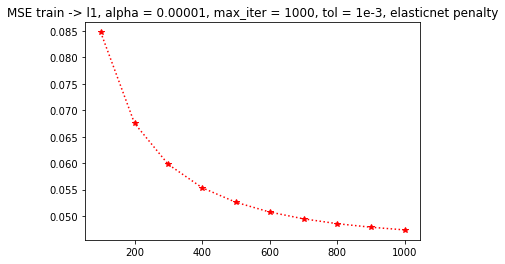

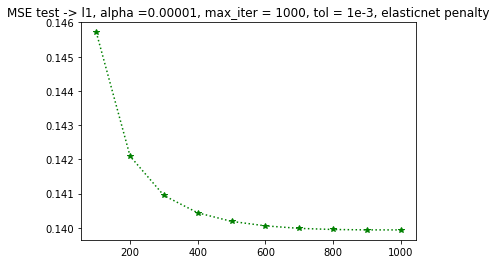

In [78]:
plt.plot(np.arange(100, 1001, 100), runtime_list_15[1:], 'b*:')
plt.title("Runtime -> l1, alpha = 0.00001, max_iter = 1000, tol = 1e-3, elasticnet penalty")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_train_list_15[1:], 'r*:')
plt.title("MSE train -> l1, alpha = 0.00001, max_iter = 1000, tol = 1e-3, elasticnet penalty")
plt.show()
plt.plot(np.arange(100, 1001, 100), MSE_test_list_15[1:], 'g*:')
plt.title("MSE test -> l1, alpha =0.00001, max_iter = 1000, tol = 1e-3, elasticnet penalty")
plt.show()

In [79]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import time


# This code shows you how you can run SGD for different parameters in the list params
# First entry is the max number of iterations
# Second is the step size rule
# Third is the stopping tolerance
params = [(1000,'constant',1e-3),(10000,'constant',1e-3),(1000,'constant',1e-4),(1000,'adaptive',1e-3)]
# params = [(1000,'constant',1e-3), (1000,'adaptive',1e-3)]

runtime_list_16 = []
MSE_train_list_16 = []
MSE_test_list_16 = []
print('Least Squares via SGD:\n')
print('{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}{:>15}'.format('max_iter','learning_rate','tol','Train MSE','Test MSE','Train R-square','Test R-square','runtime (s)'))
for param in params:
    
    start = time.time()

    #Initialize SGD regressor
    sgd             = SGDRegressor(
                                        fit_intercept   = True,
                                        alpha           = 0.0,
                                        max_iter        = param[0],
                                        learning_rate   = param[1],
                                        tol             = param[2],
                                        verbose         = True         # Change to True to see the per iteration cost
                                        )
    #Execute SGD method
    sgd.fit(X_train, y_train)

    runtime = time.time() - start

    print('Per update runtime:{:>15.3f}'.format(runtime/sgd.t_))
    print('Per epoch runtime:{:>15.3f}'.format(runtime/sgd.n_iter_))

    sgd_train_error         = mean_squared_error(sgd.predict(X_train), y_train)
    sgd_test_error          = mean_squared_error(sgd.predict(X_test), y_test)
    sgd_r_square_train      = sgd.score(X_train, y_train)    
    sgd_r_square_test       = sgd.score(X_test, y_test)   
    
    print('{:>15.4f}{:>15}{:>15.6f}{:>15.4f}{:>15.4f}{:>15.4f}{:>15.4f}{:>15.1f}'.format(param[0],param[1],param[2],sgd_train_error,sgd_test_error,sgd_r_square_train,sgd_r_square_test,runtime))
    runtime_list_16.append(runtime)
    MSE_train_list_16.append(sgd_train_error)
    MSE_test_list_16.append(sgd_test_error)
    
    

Least Squares via SGD:

       max_iter  learning_rate            tol      Train MSE       Test MSE Train R-square  Test R-square    runtime (s)
-- Epoch 1
Norm: 6.45, NNZs: 4265669, Bias: -0.101396, T: 16087, Avg. loss: 0.211077
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 7.46, NNZs: 4265669, Bias: -0.113811, T: 32174, Avg. loss: 0.123520
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 8.27, NNZs: 4265669, Bias: -0.122162, T: 48261, Avg. loss: 0.108255
Total training time: 1.06 seconds.
-- Epoch 4
Norm: 8.96, NNZs: 4265669, Bias: -0.129272, T: 64348, Avg. loss: 0.099397
Total training time: 1.39 seconds.
-- Epoch 5
Norm: 9.57, NNZs: 4265669, Bias: -0.135320, T: 80435, Avg. loss: 0.093438
Total training time: 1.75 seconds.
-- Epoch 6
Norm: 10.08, NNZs: 4265669, Bias: -0.139559, T: 96522, Avg. loss: 0.089075
Total training time: 2.11 seconds.
-- Epoch 7
Norm: 10.54, NNZs: 4265669, Bias: -0.142864, T: 112609, Avg. loss: 0.085634
Total training time: 2.49 seconds.
-- Epoch 8
N

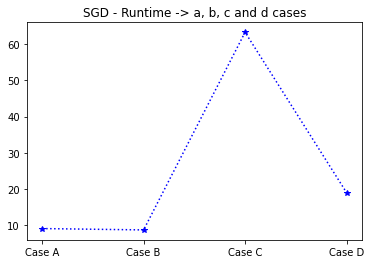

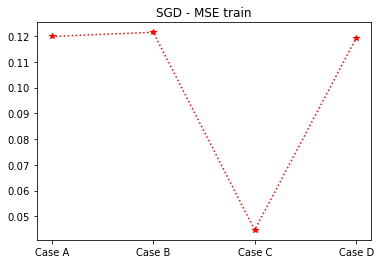

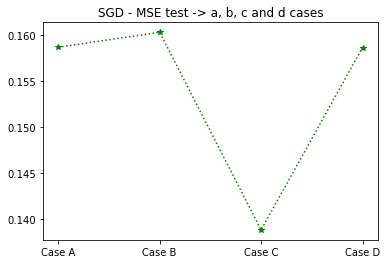

In [44]:
plt.plot(["Case A","Case B","Case C","Case D"], runtime_list_16, 'b*:')
plt.title("SGD - Runtime -> a, b, c and d cases")
plt.show()
plt.plot(["Case A","Case B","Case C","Case D"], MSE_train_list_16, 'r*:')
plt.title("SGD - MSE train")
plt.show()
plt.plot(["Case A","Case B","Case C","Case D"], MSE_test_list_16, 'g*:')
plt.title("SGD - MSE test -> a, b, c and d cases")
plt.show()

### Overlap plot
Here I plotted runtime, train MSE and test MSE for all GD cases in single plots to compare better. 

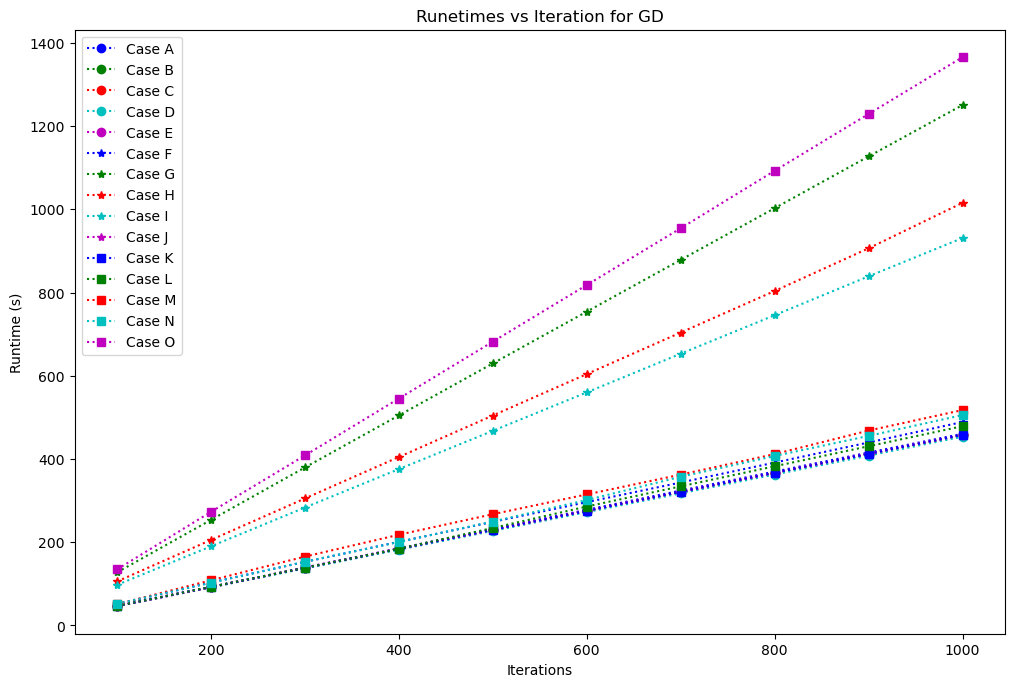

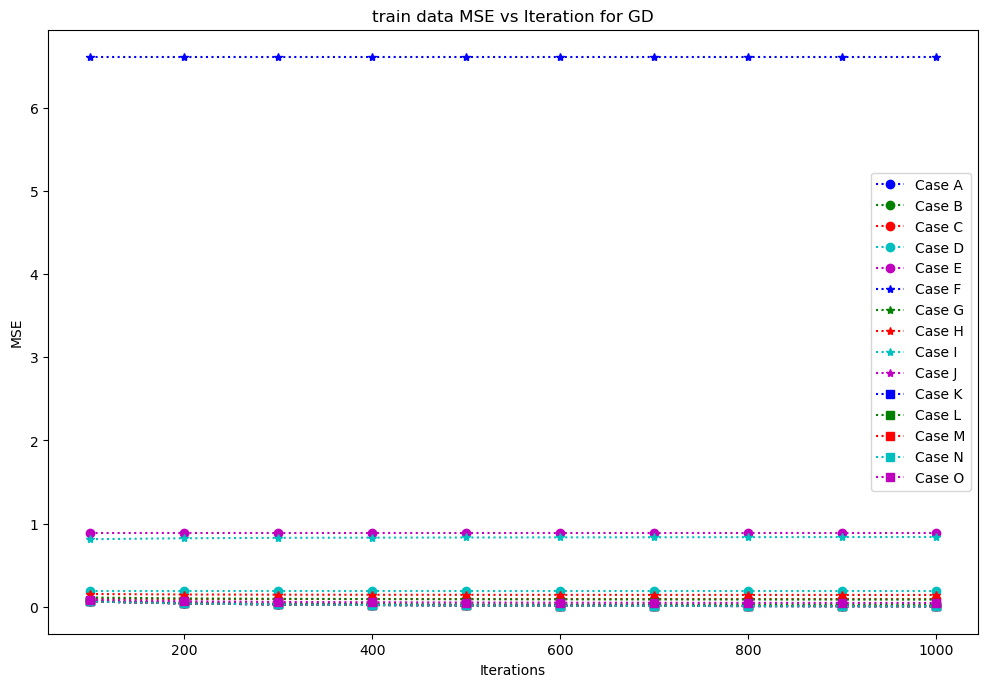

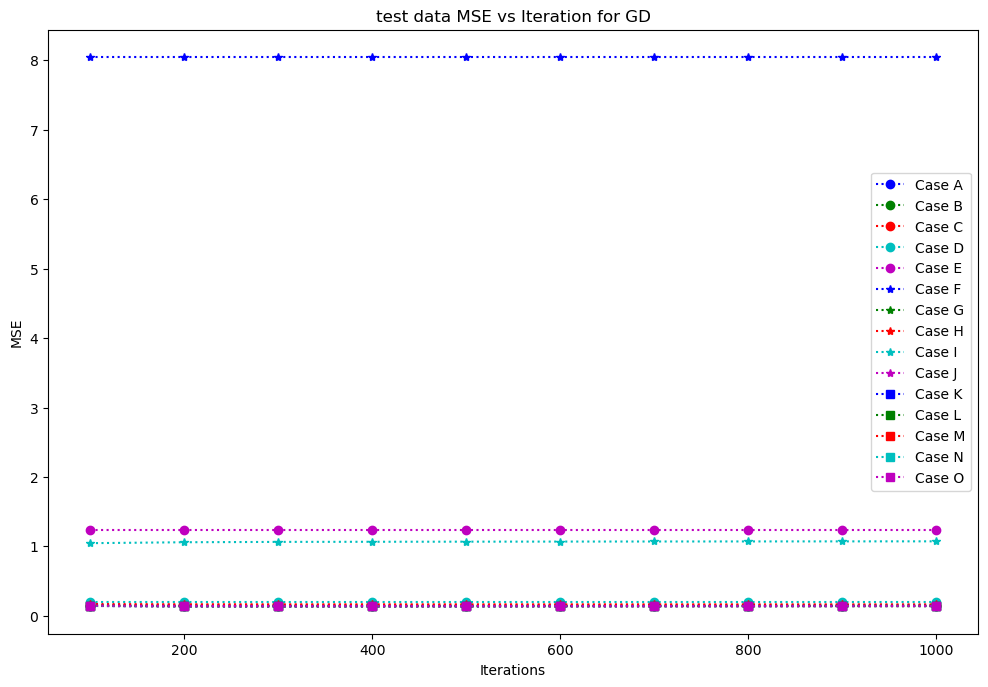

In [80]:
plt.figure(figsize=(12, 8), dpi=100)

COLOR = ['bo','go','ro','co','mo', 'b*', 'g*', 'r*', 'c*', 'm*', 'bs', 'gs', 'rs', 'cs', 'ms']


runtime_total = [runtime_list_1, runtime_list_2, runtime_list_3, runtime_list_4, runtime_list_5, runtime_list_6, runtime_list_7, runtime_list_8, runtime_list_9, runtime_list_10, runtime_list_11, runtime_list_12, runtime_list_13, runtime_list_14, runtime_list_15]
MSE_train_total = [MSE_train_list_1, MSE_train_list_2, MSE_train_list_3, MSE_train_list_4, MSE_train_list_5, MSE_train_list_6, MSE_train_list_7, MSE_train_list_8, MSE_train_list_9, MSE_train_list_10, MSE_train_list_11, MSE_train_list_12, MSE_train_list_13, MSE_train_list_14, MSE_train_list_15]
MSE_test_total = [MSE_test_list_1, MSE_test_list_2, MSE_test_list_3, MSE_test_list_4, MSE_test_list_5, MSE_test_list_6, MSE_test_list_7, MSE_test_list_8, MSE_test_list_9, MSE_test_list_10, MSE_test_list_11, MSE_test_list_12, MSE_test_list_13, MSE_test_list_14, MSE_test_list_15]
for i in range(15):
    plt.plot(np.arange(100, 1001, 100), runtime_total[i][1:], COLOR[i] , linestyle='dotted')
plt.title("Runetimes vs Iteration for GD")
plt.xlabel("Iterations")
plt.ylabel("Runtime (s)")
plt.legend(["Case A", "Case B", "Case C", "Case D", "Case E", "Case F", "Case G", "Case H", "Case I", "Case J", "Case K", "Case L", "Case M", "Case N", "Case O"])
plt.show()
plt.figure(figsize=(12, 8), dpi=100)
for i in range(15):
    plt.plot(np.arange(100, 1001, 100), MSE_train_total[i][1:], COLOR[i] , linestyle='dotted')
plt.title("train data MSE vs Iteration for GD")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend(["Case A", "Case B", "Case C", "Case D", "Case E", "Case F", "Case G", "Case H", "Case I", "Case J", "Case K", "Case L", "Case M", "Case N", "Case O"])
plt.show()
plt.figure(figsize=(12, 8), dpi=100)
for i in range(15):
    plt.plot(np.arange(100, 1001, 100), MSE_test_total[i][1:], COLOR[i] , linestyle='dotted')
plt.title("test data MSE vs Iteration for GD")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend(["Case A", "Case B", "Case C", "Case D", "Case E", "Case F", "Case G", "Case H", "Case I", "Case J", "Case K", "Case L", "Case M", "Case N", "Case O"])
plt.show()


#### To better comprehend the plots, those cases that resulted in outlier runtimes and accuracies are removed (Cases D, E, F, G, H, II, O) to have a better look upon the best configurations. These are cases where the either penalty is l2 and alpha is large or the penalty is l1. It shows that l1 regularization gives poor result in this case. The elasticnet case might have given good results but its running time was too high.

#### For remaining, the best case in giving high accuracy, faster runtime and low overfitting is case B with this configuration:
#### alpha = 0.00001, max_iter = 1000, tol = 1e-3, l2 penalty

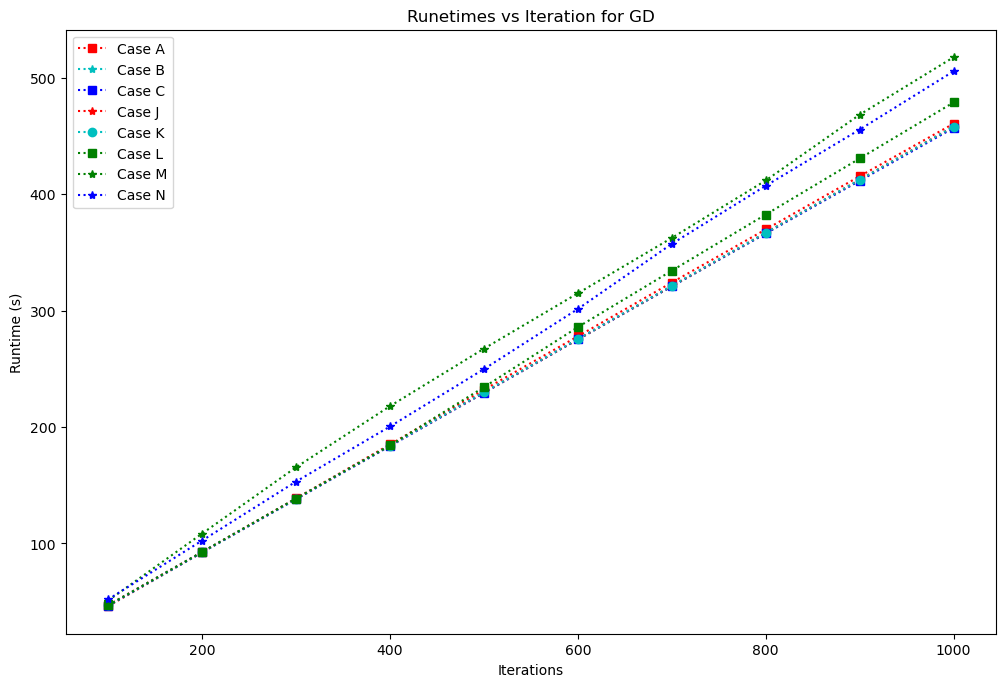

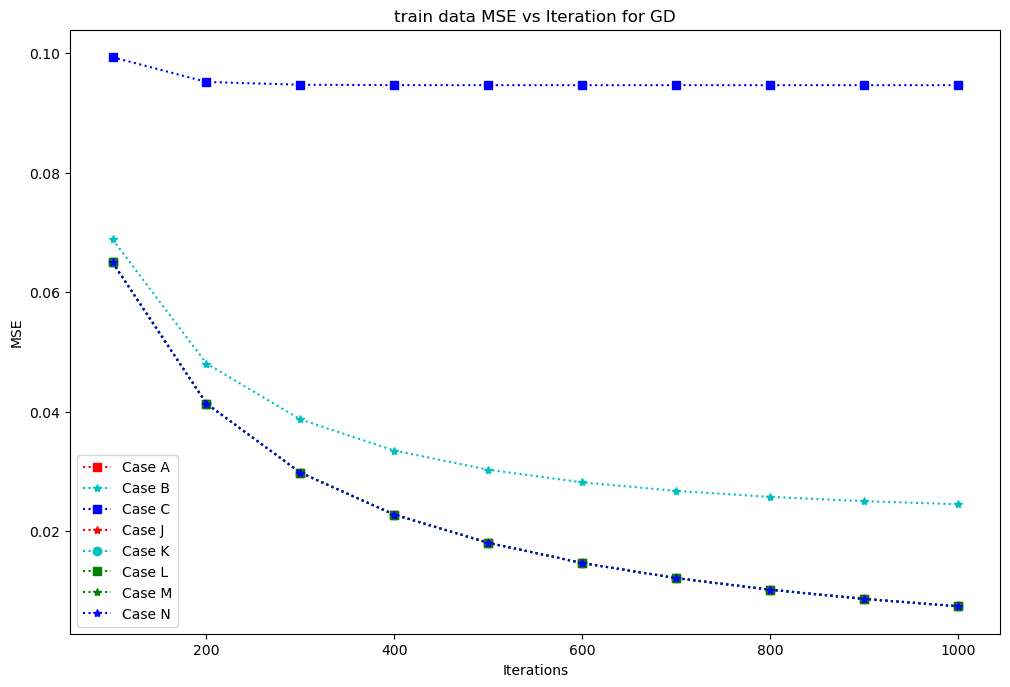

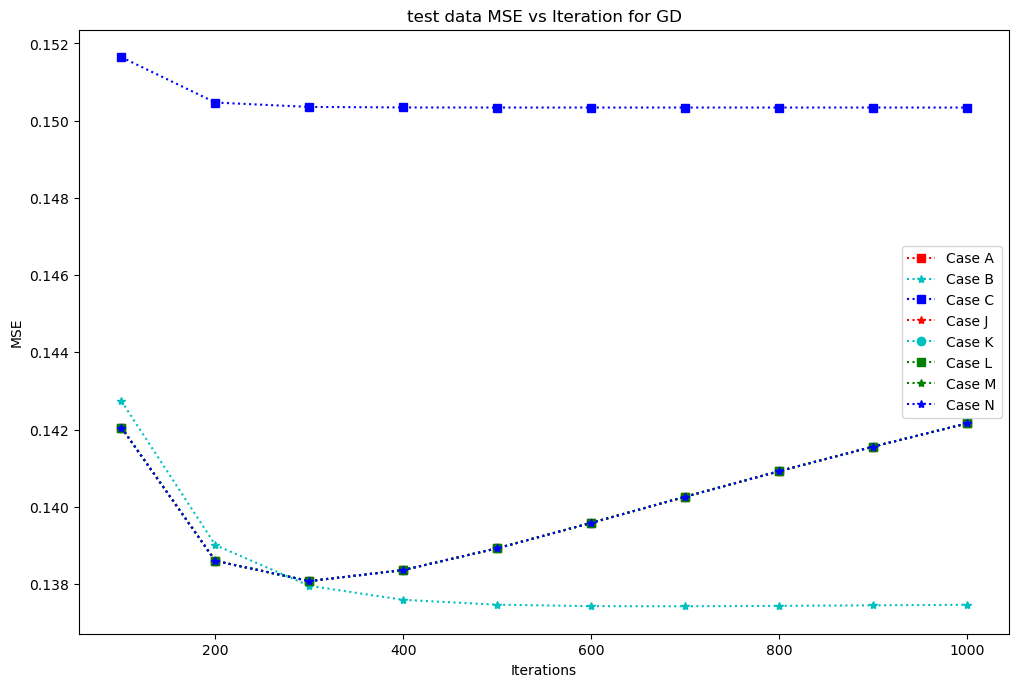

In [90]:
plt.figure(figsize=(12, 8), dpi=100)

import random
COLOR = ['bo','go','ro','co','mo', 'b*', 'g*', 'r*', 'c*', 'm*', 'bs', 'gs', 'rs', 'cs', 'ms']
random.shuffle(COLOR)

runtime_total = [runtime_list_1, runtime_list_2, runtime_list_3, runtime_list_10, runtime_list_11, runtime_list_12, runtime_list_13, runtime_list_14]
MSE_train_total = [MSE_train_list_1, MSE_train_list_2, MSE_train_list_3, MSE_train_list_10, MSE_train_list_11, MSE_train_list_12, MSE_train_list_13, MSE_train_list_14]
MSE_test_total = [MSE_test_list_1, MSE_test_list_2, MSE_test_list_3, MSE_test_list_10, MSE_test_list_11, MSE_test_list_12, MSE_test_list_13, MSE_test_list_14]
for i in range(8):
    plt.plot(np.arange(100, 1001, 100), runtime_total[i][1:], COLOR[i] , linestyle='dotted')
plt.title("Runetimes vs Iteration for GD")
plt.xlabel("Iterations")
plt.ylabel("Runtime (s)")
plt.legend(["Case A", "Case B", "Case C", "Case J", "Case K", "Case L", "Case M", "Case N"])
plt.show()
plt.figure(figsize=(12, 8), dpi=100)
for i in range(8):
    plt.plot(np.arange(100, 1001, 100), MSE_train_total[i][1:], COLOR[i] , linestyle='dotted')
plt.title("train data MSE vs Iteration for GD")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend(["Case A", "Case B", "Case C", "Case J", "Case K", "Case L", "Case M", "Case N"])
plt.show()
plt.figure(figsize=(12, 8), dpi=100)
for i in range(8):
    plt.plot(np.arange(100, 1001, 100), MSE_test_total[i][1:], COLOR[i] , linestyle='dotted')
plt.title("test data MSE vs Iteration for GD")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend(["Case A", "Case B", "Case C", "Case J", "Case K", "Case L", "Case M", "Case N"])
plt.show()


<!-------------------------------->
<!--  DO NOT CHANGE STYLE BELOW -->
<style>
H3{color:darkblue !important;font-weight: bold !important}
blockquote{background:lightcyan !important; color:black !important;padding:10pt !important;font-weight: bold !important}
table{font-size:110%  !important}
hr{width: 100% !important; height: 3px !important; background:black !important;}
</style>
<!--  DO NOT CHANGE STYLE ABOVE -->
<!-------------------------------->


---

### **Question 1. Part 3**
Compute the partial derivative of 
f
d
(
w
)
 with respect to a given 
w
j
. Suppose word 
j
 does not appear in document 
d
, that is, 
f
r
e
q
(
w
j
,
d
)
=
0
. Use your partial derivative expression to explain why we can avoid evaluating this partial derivative for document 
d
. Then use this finding to explain why the sparsity of a matrix reduces the cost of computing the gradient with respect to the number of features (i.e., 
M
). 


### **Answer.**


$$f^{d}(w) := (v^{d} - \sum_{j = 0}^{M + 1} w_{j}h_{j}(d))^2$$
$$\frac{\partial{f^{d}(w)}}{\partial{w_{j}}} = -2(h_{j}(d) + \sum_{k \neq j}^{M + 1} \frac{\partial{w_{k}}}{\partial{w_{j}}}h_{k}(d))(v^{d} - \sum_{j = 0}^{M + 1} w_{j}h_{j}(d))$$

Knowing that the word $j$'s frequency in document $d$ is $0$, and all $w_{k}$'s are taken as constant, the derivative simplifies to:

$$\frac{\partial{f^{d}(w)}}{\partial{w_{j}}} = -2(0)(v^{d} - \sum_{j = 0}^{M + 1} w_{j}h_{j}(d)) = 0$$

Therefore, one the frequency of word $j$ is zero in a document, the derivate of MSE related to that document with respect to parameter $j$ can be ignored.\

Given this fact, we can avoid evaluating the derivative of $f_{d}(w)$ with respect to parameters that correspond to elements in the data matrix that are zero.

<!-------------------------------->
<!--  DO NOT CHANGE STYLE BELOW -->
<style>
H3{color:darkblue !important;font-weight: bold !important}
blockquote{background:lightcyan !important; color:black !important;padding:10pt !important;font-weight: bold !important}
table{font-size:110%  !important}
hr{width: 100% !important; height: 3px !important; background:black !important;}
</style>
<!--  DO NOT CHANGE STYLE ABOVE -->
<!-------------------------------->

---
### References


* <a id='Kochenderfer-and-Wheeler-2019'> Kochenderfer, Mykel J., and Tim A. Wheeler. Algorithms for optimization. Mit Press, 2019.</a>









